## Датасет

Ссылка: https://www.kaggle.com/datasets/shivajbd/imagerotation

### Описание

В датасете 40000 квадратных картинок разрешением 128x128, в которых горизонт повёрнут на угол от 
-30 (30 против часовой стрелки) до +30 (30 по часовой стрелке) градусов.

## Задача

Задача регрессии -- необходимо по изображению определить, насколько оно повёрнуто

Входные признаки -- массив 128x128x3 значений пикселей

Основная метрика -- RMSE

## EDA

In [4]:
!unzip dataset.zip > /dev/null

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
with open('data/label.json', 'r') as f:
    labels = json.load(f)

In [3]:
labels = np.array(labels)

In [4]:
print(f'Mean angle: {labels.mean():.4}')
print(f'Std angle: {labels.std():.4}')

Mean angle: -0.1097
Std angle: 17.37


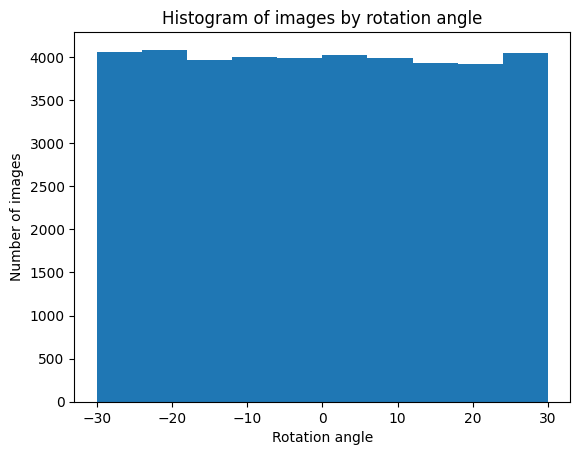

In [5]:
plt.hist(labels)
plt.xlabel('Rotation angle')
plt.ylabel('Number of images')
plt.title('Histogram of images by rotation angle')
plt.show()

#### Углы, на которые повёрнуты изображения, имеют равномерное распределение от -30 до +30 градусов (что связано с тем, что повороты в датасете сгенерированы искусственно)

In [6]:
from PIL import Image

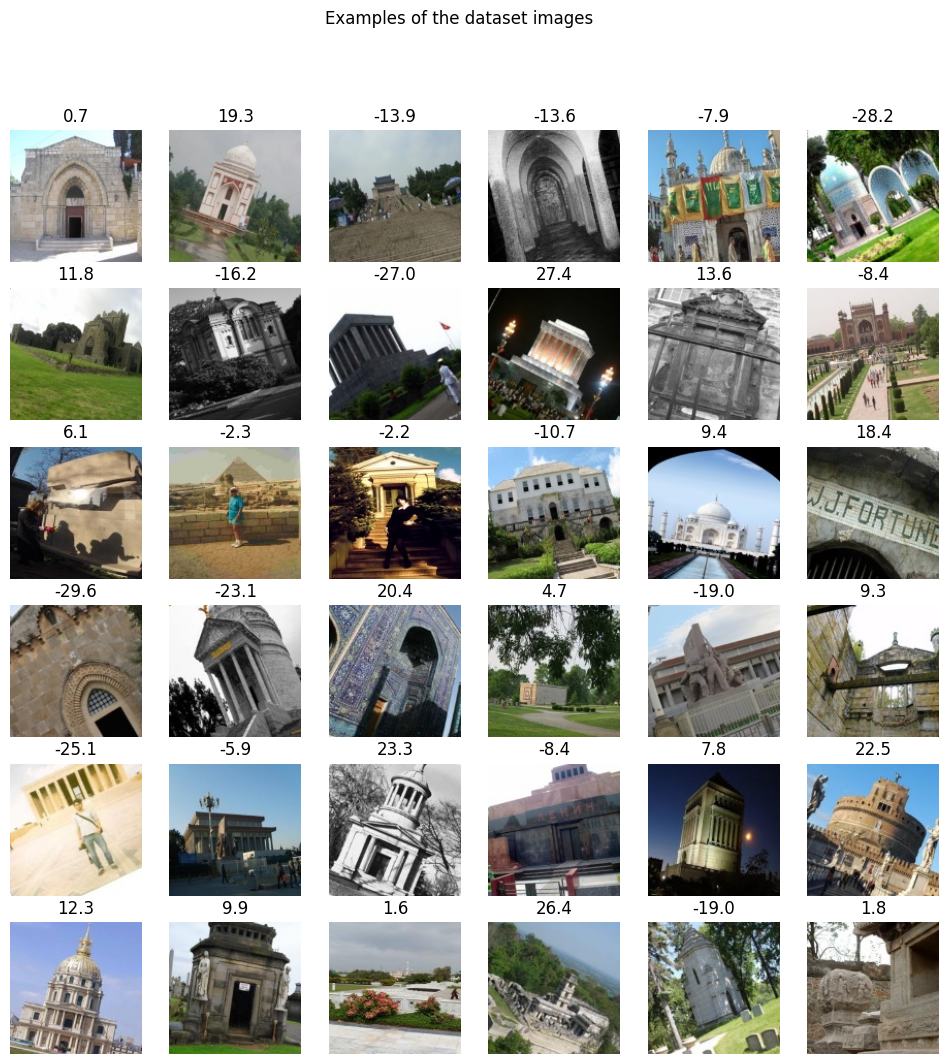

In [7]:
fig = plt.figure(figsize=(12, 12))
fig.suptitle('Examples of the dataset images')

ax = fig.subplots(6, 6)

for i in range(6):
    for j in range(6):
        img = Image.open(f'data/images/{i*8+j}.jpg')
        ang = labels[i*8+j]
        ax[i, j].imshow(img)
        ax[i, j].set_title(f'{ang:.1f}')
        ax[i, j].axis('off')

plt.show()

In [8]:
img_sum = np.zeros((128, 128, 3))
img_std = np.zeros((128, 128, 3))

for img in tqdm(range(40000)):
    img = Image.open(f'data/images/{img}.jpg')
    img_sum += np.array(img) / 255

img_sum /= 40000

for img in tqdm(range(40000)):
    img = Image.open(f'data/images/{img}.jpg')
    img_std += (np.array(img) / 255 - img_sum) ** 2

img_std /= 40000
img_std = np.sqrt(img_std)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40000/40000 [00:11<00:00, 3575.07it/s]


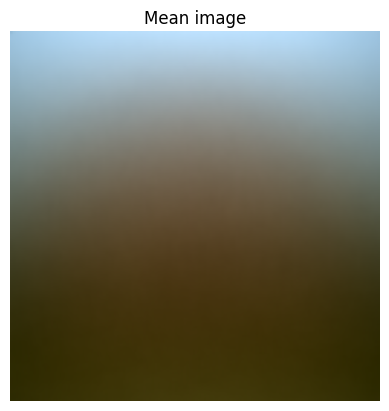

In [13]:
plt.imshow((img_sum - img_sum.min()) / (img_sum.max() - img_sum.min()))
plt.axis('off')
plt.title('Mean image')
plt.show()

#### Среднее изображение жёлтое внизу и голубое вверху, что связано c тем что в датасете в основном представлены городские пейзажи на фоне неба

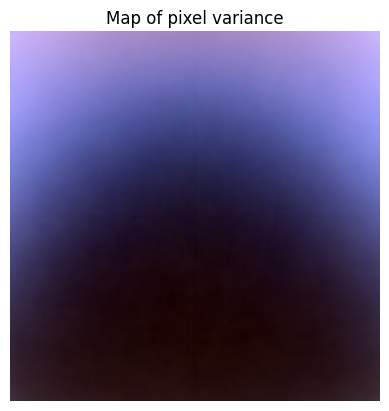

In [14]:
plt.imshow((img_std - img_std.min()) / (img_std.max() - img_std.min()))
plt.axis('off')
plt.title('Map of pixel variance')
plt.show()

#### Средняя плотность стандартного отклонения наибольшая в верхней части, что связано с тем что небо может быть синим, а может быть не синим

In [12]:
print(f'Mean pixel value: {img_sum.mean(axis=(0, 1))[0]:.04f}  {img_sum.mean(axis=(0, 1))[1]:.04f}  {img_sum.mean(axis=(0, 1))[2]:.04f}')
print(f'Std of pizel value: {img_std.mean(axis=(0, 1))[0]:.04f}  {img_std.mean(axis=(0, 1))[1]:.04f}  {img_std.mean(axis=(0, 1))[2]:.04f}')

Mean pixel value: 0.4615  0.4610  0.4372
Std of pizel value: 0.2487  0.2444  0.2607
